<a href="https://colab.research.google.com/github/RodriGuerra98/aws-lambda-developer-guide/blob/master/visualization_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports y variables globales

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/

Mounted at /content/drive
/content/drive/My Drive


In [4]:
#%cd /content/drive/MyDrive/Pesq/Tfg/Tfg21RG
%cd /content/drive/MyDrive/Pesq/Tfg/

[Errno 2] No such file or directory: '/content/drive/MyDrive/Pesq/Tfg/'
/content/drive/My Drive


##### Datasets

In [5]:
DATA_PATH_COVID = "Tfg21RG/Data/Covid/"
DATA_PATH_TURISM = "Tfg21RG/Data/Turism/"
DATA_PATH_SPAIN = "Tfg21RG/Data/Spain/"

DATA_PATH_MOMO = DATA_PATH_COVID + "data.csv" 

DATA_PATH_SPAIN_MORTALIDAD = DATA_PATH_SPAIN + "mortalidad_1991.csv"
DATA_PATH_SPAIN_DEFUNCIONES = DATA_PATH_SPAIN + "defunciones_2020.csv"
DATA_PATH_SPAIN_DEFUNCIONES_2019 = DATA_PATH_SPAIN + "defunciones_2019.csv"
DATA_PATH_SPAIN_DEFUNCIONES_1991 = DATA_PATH_SPAIN + "defunciones_1991_2019.csv"
DATA_PATH_SPAIN_DEFUNCIONES_2019_2021 = DATA_PATH_SPAIN + "muertes_semanales_2019_2021.csv"
DATA_PATH_SPAIN_DEFUNCIONES_1900_2020 = DATA_PATH_SPAIN + "defunciones_1900_2020.csv"
DATA_PATH_SPAIN_TASA_1900_2020 = DATA_PATH_SPAIN + "tasa_de_muertes_1900_2020.csv"
DATA_PATH_SPAIN_DEFUNCIONES_2019vs2020 = DATA_PATH_SPAIN + "ccaa_muertes_2019vs2020.csv"
DATA_PATH_SPAIN_TASA_2019vs2020 = DATA_PATH_SPAIN + "ccaa_tasa_2019vs2020.csv"

DATA_PATH_SPAIN_DEFUNCIONES_COVID = DATA_PATH_SPAIN + "defunciones_covid_2020.csv"
DATA_PATH_SPAIN_MORTALIDAD_COVID = DATA_PATH_SPAIN + "mortalidad_covid_2020.csv"
DATA_PATH_SPAIN_CAUSA_COVID = DATA_PATH_SPAIN + "causa_covid_2020.csv"
DATA_PATH_SPAIN_DEFUNCIONES_CAUSAS = DATA_PATH_SPAIN + "defunciones_causas_2020.csv"
DATA_PATH_SPAIN_DEFUNCIONES_2016_2020 = DATA_PATH_SPAIN + "defunciones_2016_2020.csv"
DATA_PATH_SPAIN_NACIMIENTOS = DATA_PATH_SPAIN + "nacimientos_2020.csv"
DATA_PATH_SPAIN_POBLACION = DATA_PATH_SPAIN + "poblacion.csv"
# https://cnecovid.isciii.es/covid19/#documentaci%C3%B3n-y-datos
DATA_PATH_SPAIN_CASOS_COVID = DATA_PATH_SPAIN + "casos_covid_ccaa.csv"
# https://www.ine.es/jaxiT3/Datos.htm?t=2074
DATA_PATH_SPAIN_VIAJEROS = DATA_PATH_SPAIN + "viajeros_ccaa.csv"
DATA_PATH_SPAIN_VIAJEROS_V2 = DATA_PATH_SPAIN + "evolucion_de_la_llegada_d.csv"

DATA_PATH_SPAIN_VACUNAS = DATA_PATH_SPAIN + "vacunas_españa.csv"

URL_OWID_COVID = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
URL_OWID_VACCINATIONS = "https://covid.ourworldindata.org/data/vaccinations/vaccinations.csv"
URL_ECDC_COVID = "https://opendata.ecdc.europa.eu/covid19/nationalcasedeath_eueea_daily_ei/csv/data.csv"
URL_ECDC_COVID_CASES = "https://opendata.ecdc.europa.eu/covid19/casedistribution/csv/data.csv"
URL_ECDC_COVID_RESPONSE = "https://www.ecdc.europa.eu/sites/default/files/documents/response_graphs_data_2021-04-15.csv"
URL_ECDC_VACCINATIONS ="https://opendata.ecdc.europa.eu/covid19/vaccine_tracker/csv/data.csv"
DATA_PATH_EUR_NUM_TURISM = DATA_PATH_TURISM + "OWID/international-tourism-number-of-arrivals.csv"
DATA_PATH_EUR_ARRIVALS_TURISM = DATA_PATH_TURISM + "OWID/international-tourist-arrivals-by-world-region.csv"


# Preprocess

#### Codigos, estandarizacion


In [6]:
standardize = {
    "ccaa" : {
        "Nacional": 0,
        "Total": 0,
        "Andalucía": 1,
        "AN": 1,
        "Aragón": 2,
        "AR": 2,
        "Asturias": 3,
        "AS": 3,
        "Balear":	4,
        "IB": 4,
        "Canarias":	5,
        "CN": 5,
        "Cantabria":	6,
        "CB": 6,
        "León":	7,
        "Leon":	7,
        "CL": 7,
        "Mancha":	8,
        "CM": 8,
        "Cataluña":	9,
        "CT": 9,
        "Valenciana":	10,
        "VC": 10,
        "Extremadura":	11,
        "EX": 11,
        "Galicia":	12,
        "GA": 12,
        "Madrid":	13,
        "MD": 13,
        "Murcia":	14,
        "MC": 14,
        "Nav":	15,
        "NC": 15,
        "Vasco":	16,
        "PV": 16,
        "Rioja":	17,
        "RI": 17,
        "Ceuta":	18,
        "CE": 18,
        "Melilla":	19,
        "ML": 19,
        "Extranjero": 20,
        "Fuerzas Armadas": 21
    },
    "gender": {
        "Hombre": 2,
        "Hombres": 2,
        "hombres": 2,
        "Varones": 2,
        "Mujer": 1,
        "Mujeres": 1,
        "mujeres": 1,
        "Total": 0,
        "all": 0,
        "Todos": 0,
        "todos": 0,
        "Ambos sexos": 0
    },
    "age": {
        "all": 22, 
        "menos_65": 1, # 1-14
        "65_74": 14, # o 15 
        "mas_74": 16, # o 17 - 21
        "0 años": 0,
        "De 1 a 4 años": 1, 
        "De 5 a 9 años": 2, 
        'De 10 a 14 años': 3,
        'De 15 a 19 años': 4, 
        'De 20 a 24 años': 5, 
        'De 25 a 29 años': 6,
        'De 30 a 34 años': 7, 
        'De 35 a 39 años': 8, 
        'De 40 a 44 años': 9,
        'De 45 a 49 años': 10, 
        'De 50 a 54 años': 11, 
        'De 55 a 59 años': 12,
        'De 60 a 64 años': 13, 
        'De 65 a 69 años': 14, 
        'De 70 a 74 años': 15,
        'De 75 a 79 años': 16, 
        'De 80 a 84 años': 17, 
        'De 85 a 89 años': 18,
        '90 y más años': 19, 
        'De 90 a 94 años': 20, 
        '95 y más años': 21
    },
    "functions": {
       'Tasa de mortalidad': 0,
       'Promedio de años vividos el último año de vida': 1,
       'Riesgo de muerte': 2, 
       'Supervivientes': 3, 
       'Defunciones teóricas': 4,
       'Población estacionaria': 5, 
       'Tiempo por vivir': 6, 
       'Esperanza de vida': 7 
    }, 
    "month": {
        "Total": 0,
        "Enero": 1,
        "Febrero": 2,
        "Marzo": 3,
        "Abril": 4,
        "Mayo": 5,
        "Junio": 6,
        "Julio": 7,
        "Agosto": 8,
        "Septiembre": 9,
        "Octubre": 10,
        "Noviembre": 11,
        "Diciembre": 12
    },
    "covid": {
      'Total': 0,
      'Covid-19 Virus identificado': 1,
      'Covid-19 Virus no identificado (sospechoso)': 2, 
      'Covid-19 virus no identificado (sospechoso)(comorbilidad)': 2,	
      'Otras causas': 3,
      'Total Defunciones con covid-19 (comorbilidad)': 4,
      'Covid-19 Virus identificado (comorbilidad)': 1
    },
    "place": {
      'Total': 0, 
      'Centro hospitalario': 1, 
      'Domicilio particular': 2,
      'Residencia socio-sanitaria' : 3, 
      'Otro Lugar': 4, 
      'No consta': 5
    }

    
}


#### Funciones

In [7]:
def dateFormatter(df, dateColumnName):
  df[dateColumnName] = pd.to_datetime(df[dateColumnName], errors='coerce')
  df['year']= df[dateColumnName].dt.year
  df['month']= df[dateColumnName].dt.month
  df['day']= df[dateColumnName].dt.day
  return df;

In [8]:
def splitYearWeek(df, columnName):
  df[["year", "week"]] = df[columnName].str.split("SM", expand=True);
  return df;

In [9]:
def splitYearMonth(df, columnName):
  df[["year", "month"]] = df[columnName].str.split("M", expand=True);
  return df;

In [10]:
def numerizacionDeAtributos(dataset, reglas, atributo, doesContains):
  # dataset[atributo + "_original"] = dataset[atributo]
        
  try:
    if doesContains:
      for regla in reglas:
        dataset.loc[dataset[atributo].str.contains(regla, case=True, na=False), atributo] = reglas[regla]
    else:
      dataset[atributo] = dataset[atributo].map(reglas)
  except:
    pass
  return dataset


In [11]:
def extraerEnteros(dataset, atributo):
  dataset[atributo] = pd.to_numeric(dataset[atributo].str.extract(r'(\d+)', expand=False))
  return dataset;


In [12]:
def hotEncoding(df, columnName):
  ord_enc = OrdinalEncoder()
  df = df.dropna(subset=[columnName])
  df[columnName + "_code"] = ord_enc.fit_transform(df[[columnName]])
  return df;

In [13]:
def preprocess():
  createDataset();
  normalizar();
  preprocesar();
  train_test_split(data, test_size=porcentaje_test,random_state=seed)

In [14]:
def normalizar(columns):
  for column in columns:
    dataset[column] = dataset[column] /dataset[column].abs().max()    

In [15]:
def removeRowsContainingUnnecessaryData(df, columnName,unwantedString):
  return df[~df[columnName].isin([unwantedString])] 
  

In [16]:
def calcularMedia(df, atributo):
  df = df.groupby(["year", atributo], as_index=False)
  df = df.sample()
  return df[["year", atributo]].describe()

In [17]:
def calcularOperacionesBasicas(df, atributo, doSum):
  if doSum == False:
    return calcularMedia(df, atributo)
  else:
    df = df.groupby(["year"], as_index=False).agg({atributo: "sum"})
    df = df.sample()
    return df[["year", atributo]].describe()

In [18]:
def percentageToNumeric(x):
  x = x.replace(",", ".")
  return x.strip('%')

In [19]:
df_vaccinations_ecdc = pd.read_csv(URL_ECDC_VACCINATIONS)
df_vaccinations_ecdc.sort_values('YearWeekISO')

,YearWeekISO,FirstDose,FirstDoseRefused,SecondDose,UnknownDose,NumberDosesReceived,Region,Population,ReportingCountry,TargetGroup,Vaccine,Denominator
15412,2020-W52,1708,0.0,0,0,1708.0,LT02,2794090,LT,ALL,COM,1630458.0
8757,2020-W52,0,NaN,0,0,NaN,FR1,67320216,FR,Age80+,UNK,NaN
8758,2020-W52,0,NaN,0,0,NaN,FR,67320216,FR,Age80+,UNK,4144810.0
8759,2020-W52,0,NaN,0,0,NaN,FR,67320216,FR,AgeUNK,UNK,NaN
8760,2020-W52,0,NaN,0,0,NaN,FR,67320216,FR,HCW,UNK,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
30039,2021-W19,54,0.0,0,0,NaN,PL52,37958138,PL,Age25_49,JANSS,340831.0
30040,2021-W19,909,0.0,40,0,NaN,PL52,37958138,PL,Age25_49,MOD,340831.0
30041,2021-W19,1129,0.0,1390,0,NaN,PL61,37958138,PL,Age25_49,AZ,754125.0
30033,2021-W19,2463,0.0,117,0,NaN,PL21,37958138,PL,Age25_49,COM,1266726.0


# España

In [20]:
## Spain
# df_covid_momo
# df_mortality_spain
# df_deaths_spain
# df_births_spain
# df_population_spain
# df_deaths_covid_spain
# df_mortality_covid_spain
# df_cause_covid_spain
# df_deaths_2016_2020_spain
# df_deaths_cause_spain
# df_ncasos_covid
# df_viajeros_ccaa

# ## ECDC
# df_vaccinations_online
# df_covid_ecdc
# df_covid_ecdc_cases
# df_covid_ecdc_response
# df_vaccinations_ecdc

#### Defunciones

##### Defunciones en españa 2019-2021 (MoMo)


In [21]:
df_covid_momo = pd.read_csv(DATA_PATH_MOMO)
pd.options.display.float_format = '{:,.0f}'.format
# Preprocess
df_covid_momo = df_covid_momo.rename(columns={"cod_ine_ambito": "ccaa", "nombre_sexo": "gender", "cod_gedad": "age", "defunciones_observadas": "deaths"})
df_covid_momo['ccaa'] = df_covid_momo['ccaa'].fillna(0)

df_covid_momo = numerizacionDeAtributos(df_covid_momo, standardize["gender"], "gender", True)
df_covid_momo = numerizacionDeAtributos(df_covid_momo, standardize["age"], "age", True)
df_covid_momo["deaths"] = df_covid_momo["deaths"].astype(float) 

## Graphic of deaths of covid in spain 
df_covid_momo_graphic = df_covid_momo[(df_covid_momo["gender"] == 0) & (df_covid_momo["age"] == 22)]
fig = px.line(df_covid_momo_graphic, x="fecha_defuncion", y="deaths", color="ccaa",
              line_group="ccaa", title="Defunciones diarias en España por región desde 2019 a la actualidad")
fig.show()

# # Show data
df_covid_momo = dateFormatter(df_covid_momo, "fecha_defuncion")
df_covid_momo = df_covid_momo[["ccaa", "gender", "age", "year", "month", "day", "deaths"]]
df_covid_momo.head(n=20)

,ccaa,gender,age,year,month,day,deaths
0,0,0,22,2019,3,28,"1,142"
1,0,0,22,2019,3,29,"1,110"
2,0,0,22,2019,3,30,"1,133"
3,0,0,22,2019,3,31,"1,046"
4,0,0,22,2019,4,1,"1,113"
5,0,0,22,2019,4,2,"1,080"
6,0,0,22,2019,4,3,"1,154"
7,0,0,22,2019,4,4,"1,097"
8,0,0,22,2019,4,5,"1,140"
9,0,0,22,2019,4,6,"1,165"


##### Defunciones en españa (incluyendo ccaa) desde 1991 hasta 2018

In [53]:
df_defunciones_spain_1991_2018 = pd.read_csv(DATA_PATH_SPAIN_DEFUNCIONES_1991, sep=";", decimal=',', thousands='.', encoding='latin-1')
df_defunciones_spain_1991_2018 = df_defunciones_spain_1991_2018.rename(columns={"Comunidades y Ciudades Autónomas": "ccaa", "Periodo": "year", "Total": "deaths"})
df_defunciones_spain_1991_2018 = df_defunciones_spain_1991_2018.loc[df_defunciones_spain_1991_2018["year"] != 2019]
df_defunciones_spain_1991_2018["ccaa"] = df_defunciones_spain_1991_2018["ccaa"].replace("Total", "0 Total")
df_defunciones_spain_1991_2018["ccaa"] = df_defunciones_spain_1991_2018["ccaa"].replace("Extranjero", "20 Extranjero")
df_defunciones_spain_1991_2018 = extraerEnteros(df_defunciones_spain_1991_2018, "ccaa") 
df_defunciones_spain_1991_2018 = df_defunciones_spain_1991_2018[["year", "ccaa", "deaths"]]

# ## Graphic of deaths of covid in spain 
fig = px.line(df_defunciones_spain_1991_2018, x="year", y="deaths", color="ccaa",
              line_group="ccaa", title="Defunciones anuales en España por región desde 1991 hasta 2018 (las ccaa desde 2006)")
fig.show()

df_defunciones_spain_1991_2018[df_defunciones_spain_1991_2018["ccaa"] == 8]

,year,ccaa,deaths
225,2018,8,"19,574"
226,2017,8,"20,208"
227,2016,8,"19,144"
228,2015,8,"19,923"
229,2014,8,"18,379"
230,2013,8,"18,228"
231,2012,8,"19,051"
232,2011,8,"18,053"
233,2010,8,"17,457"
234,2009,8,"17,771"


##### Defunciones en españa 2019


In [23]:
df_defunciones_spain_2019 = pd.read_csv(DATA_PATH_SPAIN_DEFUNCIONES_2019, sep=";", decimal=',', thousands='.', encoding='latin-1')
df_defunciones_spain_2019 = df_defunciones_spain_2019.rename(columns={"Comunidad Autónoma de residencia": "ccaa", "Total": "deaths"})
df_defunciones_spain_2019 = numerizacionDeAtributos(df_defunciones_spain_2019, standardize["ccaa"], "ccaa", True)
df_defunciones_spain_2019["year"] = 2019
df_defunciones_spain_2019 = df_defunciones_spain_2019[["year", "ccaa", "deaths"]]


# since is only one year we don't show a graphic

df_defunciones_spain_2019

,year,ccaa,deaths
0,2019,0,418703
1,2019,1,70505
2,2019,2,13620
3,2019,3,12893
4,2019,4,7995
5,2019,5,15756
6,2019,6,6013
7,2019,7,28719
8,2019,8,19467
9,2019,9,64547


##### Defunciones en españa 2020

In [24]:
df_defunciones_spain_2020 = pd.read_csv(DATA_PATH_SPAIN_DEFUNCIONES, sep=";", thousands=".")
df_defunciones_spain_2020.head()
df_defunciones_spain_2020 = df_defunciones_spain_2020.rename(columns={"Comunidad autónoma de residencia del fallecido": "ccaa", "Sexo": "gender", "Mes": "month", "Total": "deaths"})
df_defunciones_spain_2020 = df_defunciones_spain_2020[~df_defunciones_spain_2020['deaths'].isin(['..'])]
df_defunciones_spain_2020 = numerizacionDeAtributos(df_defunciones_spain_2020, standardize["gender"], "gender", True)
df_defunciones_spain_2020 = numerizacionDeAtributos(df_defunciones_spain_2020, standardize["month"], "month", True)
df_defunciones_spain_2020 = numerizacionDeAtributos(df_defunciones_spain_2020, standardize["ccaa"], "ccaa", True)
df_defunciones_spain_2020['year'] = 2020

df_defunciones_spain_graphic = df_defunciones_spain_2020[(df_defunciones_spain_2020["gender"] == 0) & (df_defunciones_spain_2020["month"] > 0)]
# ## Graphic of deaths of covid in spain 
fig = px.line(df_defunciones_spain_graphic, x="month", y="deaths", color="ccaa",
              line_group="ccaa", title="Defunciones mensuales por región durante 2020")
fig.show()

df_defunciones_spain_2020
# df_defunciones_spain_2020[(df_defunciones_spain_2020["ccaa"] == 0) & (df_defunciones_spain_2020["gender"] == 0) ]

,ccaa,month,gender,deaths,year
0,0,0,0,262373,2020
1,0,0,2,131326,2020
2,0,0,1,131047,2020
3,0,1,0,42807,2020
4,0,1,2,21401,2020
...,...,...,...,...,...
436,20,5,2,41,2020
437,20,5,1,25,2020
438,20,6,0,53,2020
439,20,6,2,36,2020


##### Defunciones anuales solo en España desde 1900 - 2020

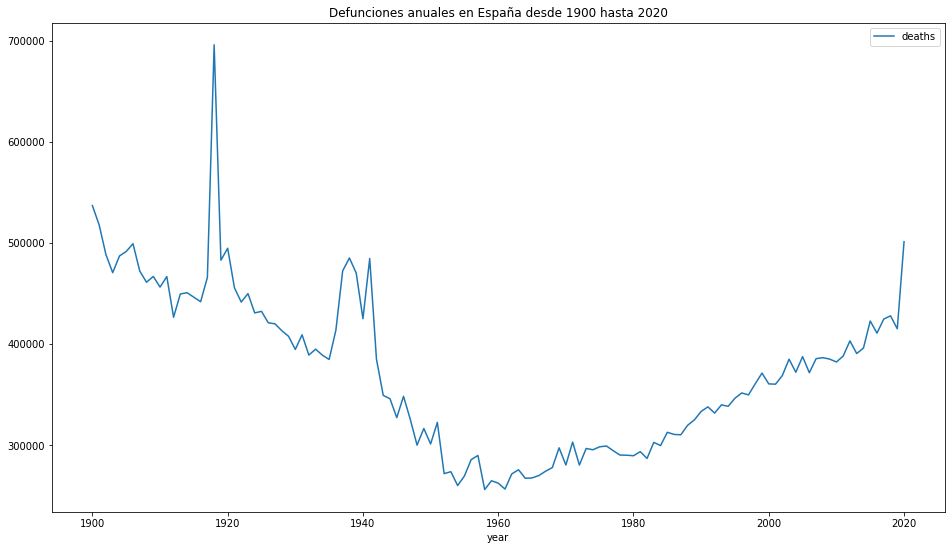

,year,deaths,ccaa
0,1900,536716,0
1,1901,517575,0
2,1902,488289,0
3,1903,470387,0
4,1904,486889,0
...,...,...,...
115,2016,410611,0
116,2017,424523,0
117,2018,427721,0
118,2019,414914,0


In [25]:
df_defunciones_spain_1900_2020 = pd.read_csv(DATA_PATH_SPAIN_DEFUNCIONES_1900_2020, sep=";", thousands=".")
# # ## Graphic of deaths of covid in spain
df_defunciones_spain_1900_2020 = df_defunciones_spain_1900_2020.rename(columns={"Año": "year", "Defunciones (los datos de 2020 son provisionales)": "deaths"})
df_defunciones_spain_1900_2020 = df_defunciones_spain_1900_2020[["year", "deaths"]]
df_defunciones_spain_1900_2020["ccaa"] = 0
df_defunciones_spain_1900_2020.plot(x="year", y="deaths", figsize=(16,9), title="Defunciones anuales en España desde 1900 hasta 2020")
plt.show()
df_defunciones_spain_1900_2020

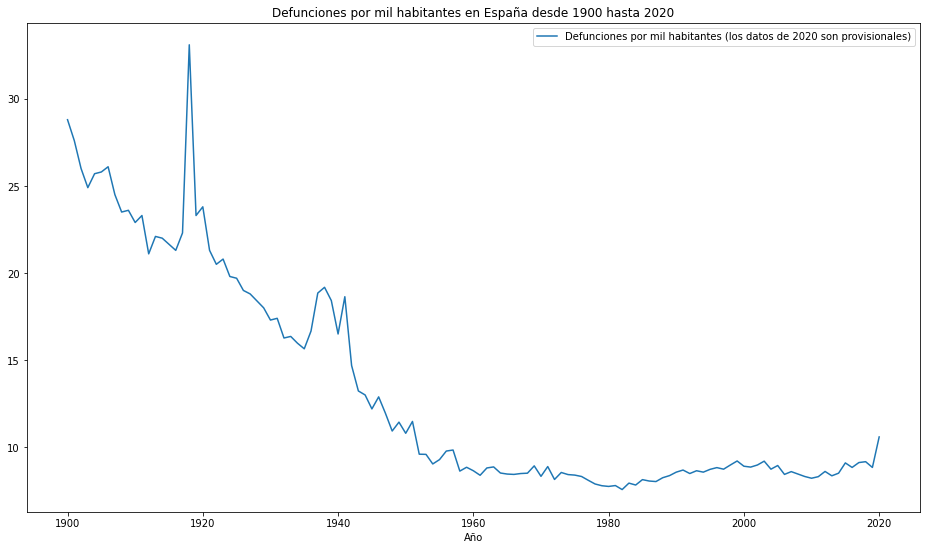

,Año,Periodo,Defunciones por mil habitantes (los datos de 2020 son provisionales)
0,1900,Año,29
1,1901,Año,28
2,1902,Año,26
3,1903,Año,25
4,1904,Año,26
...,...,...,...
115,2016,Año,9
116,2017,Año,9
117,2018,Año,9
118,2019,Año,9


In [26]:
df_tasa_spain_1900_2020 = pd.read_csv(DATA_PATH_SPAIN_TASA_1900_2020, sep=";", thousands=".", decimal=",")
# # ## Graphic of deaths of covid in spain
df_tasa_spain_1900_2020.plot(x="Año", y="Defunciones por mil habitantes (los datos de 2020 son provisionales)", figsize=(16,9),
                             title="Defunciones por mil habitantes en España desde 1900 hasta 2020")
plt.show()
df_tasa_spain_1900_2020

##### Defunciones semanales 2019-2021


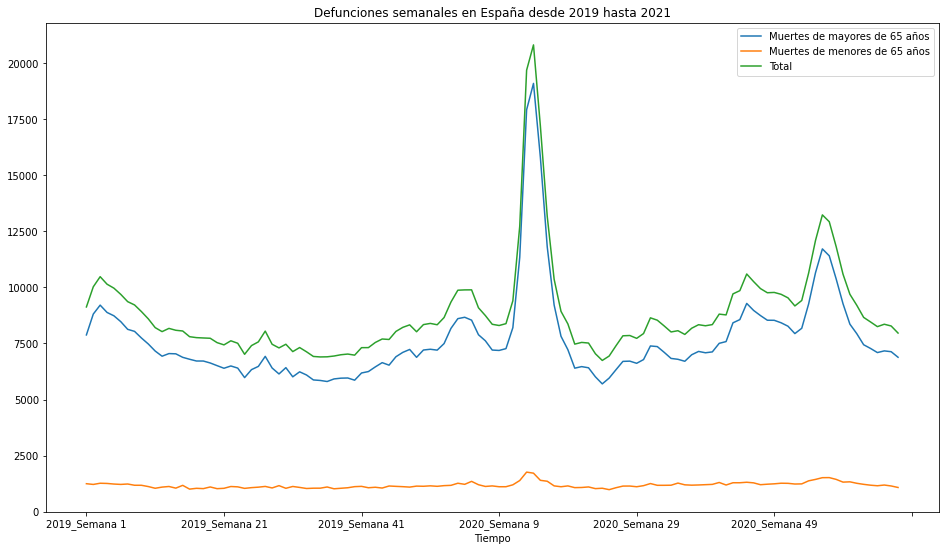

,Año,Periodo,Muertes de mayores de 65 años,Muertes de menores de 65 años,Tiempo,Total
0,2019,Semana 1,7880,1247,2019_Semana 1,9127
1,2019,Semana 2,8810,1215,2019_Semana 2,10025
2,2019,Semana 3,9208,1268,2019_Semana 3,10476
3,2019,Semana 4,8882,1259,2019_Semana 4,10141
4,2019,Semana 5,8732,1232,2019_Semana 5,9964
...,...,...,...,...,...,...
114,2021,Semana 10,7277,1181,2021_Semana 10,8458
115,2021,Semana 11,7093,1156,2021_Semana 11,8249
116,2021,Semana 12,7168,1188,2021_Semana 12,8356
117,2021,Semana 13,7132,1146,2021_Semana 13,8278


In [27]:
df_defunciones_spain_2019_2021 = pd.read_csv(DATA_PATH_SPAIN_DEFUNCIONES_2019_2021, sep=";", thousands=".")

df_defunciones_spain_2019_2021["Tiempo"] = df_defunciones_spain_2019_2021["Año"].apply(str)  + "_" + df_defunciones_spain_2019_2021["Periodo"]
df_defunciones_spain_2019_2021["Total"] = df_defunciones_spain_2019_2021["Muertes de menores de 65 años"] + df_defunciones_spain_2019_2021["Muertes de mayores de 65 años"]

# # ## Graphic of deaths of covid in spain

df_defunciones_spain_2019_2021.plot(x="Tiempo", y=["Muertes de mayores de 65 años", "Muertes de menores de 65 años", "Total"], 
                                    figsize=(16,9), title="Defunciones semanales en España desde 2019 hasta 2021")
plt.show()

df_defunciones_spain_2019_2021

##### CCAA comparacion de defunciones 2019 vs 2020

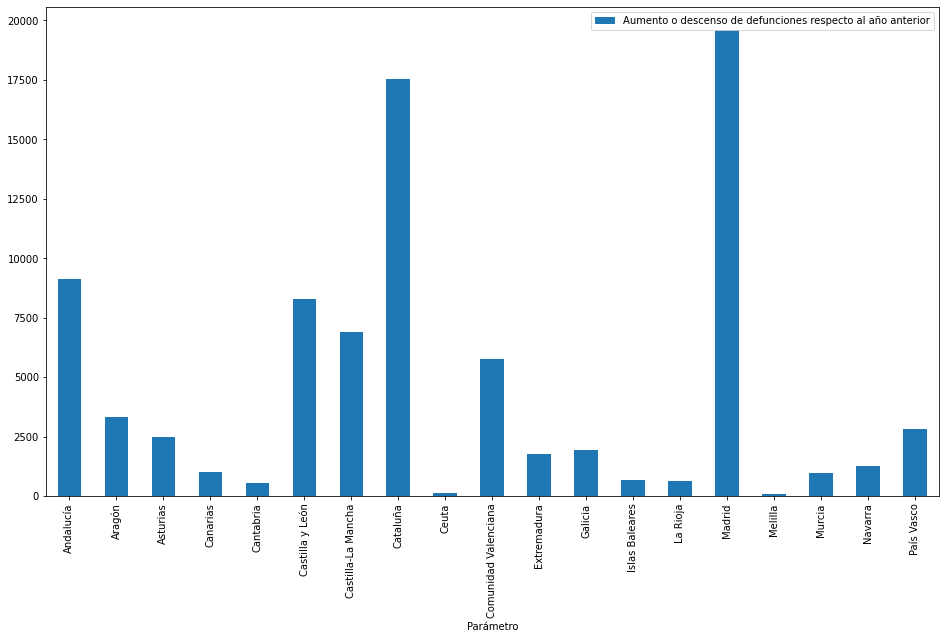

,Año,Periodo,Parámetro,Aumento o descenso de defunciones respecto al año anterior
0,2020,Año,Andalucía,9133
1,2020,Año,Aragón,3317
2,2020,Año,Asturias,2502
3,2020,Año,Canarias,1024
4,2020,Año,Cantabria,551
5,2020,Año,Castilla y León,8269
6,2020,Año,Castilla-La Mancha,6909
7,2020,Año,Cataluña,17516
8,2020,Año,Ceuta,114
9,2020,Año,Comunidad Valenciana,5762


In [28]:
df_defunciones_spain_2019vs2020 = pd.read_csv(DATA_PATH_SPAIN_DEFUNCIONES_2019vs2020, sep=";", thousands=".")

df_defunciones_spain_2019vs2020
# # ## Graphic of deaths of covid in spain

df_defunciones_spain_2019vs2020.plot(x="Parámetro", y="Aumento o descenso de defunciones respecto al año anterior", figsize=(16,9), kind="bar")
plt.show()

df_defunciones_spain_2019vs2020

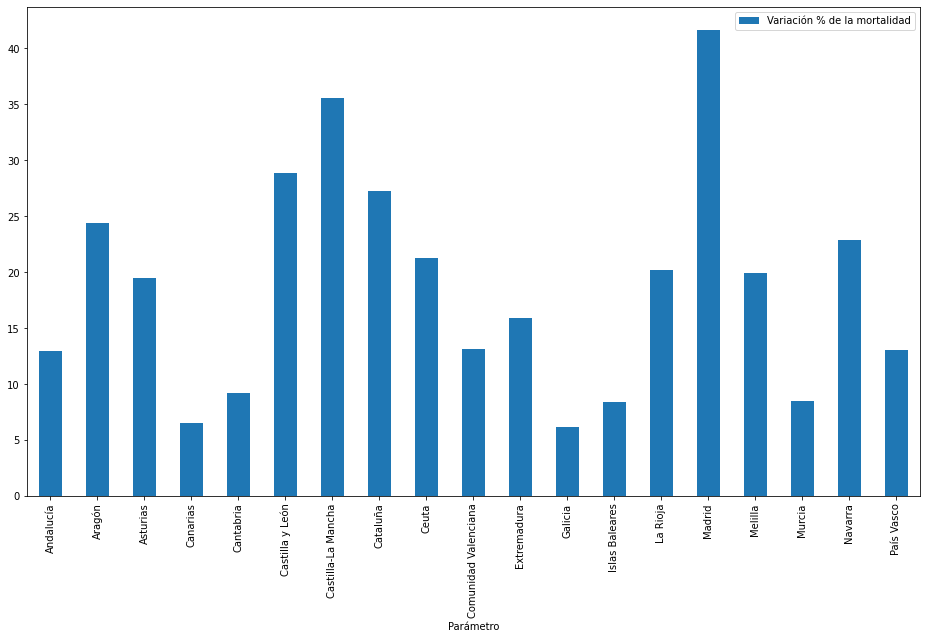

,Año,Periodo,Parámetro,Variación % de la mortalidad
0,2020,Año,Andalucía,13
1,2020,Año,Aragón,24
2,2020,Año,Asturias,19
3,2020,Año,Canarias,7
4,2020,Año,Cantabria,9
5,2020,Año,Castilla y León,29
6,2020,Año,Castilla-La Mancha,36
7,2020,Año,Cataluña,27
8,2020,Año,Ceuta,21
9,2020,Año,Comunidad Valenciana,13


In [29]:
df_tasa_spain_2019vs2020 = pd.read_csv(DATA_PATH_SPAIN_TASA_2019vs2020, sep=";", thousands=".", decimal=",", float_precision='high')

df_tasa_spain_2019vs2020
# # ## Graphic of deaths of covid in spain

df_tasa_spain_2019vs2020.plot(x="Parámetro", y="Variación % de la mortalidad", figsize=(16,9), kind="bar")
plt.show()

df_tasa_spain_2019vs2020

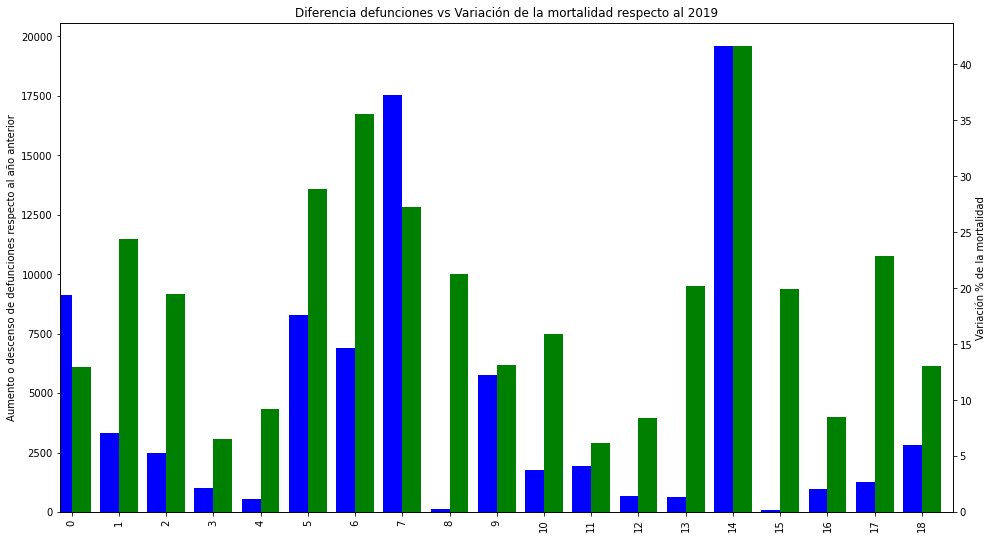

In [30]:
fig = plt.figure(figsize=(16, 9))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

ax1.set_ylabel('Aumento o descenso de defunciones respecto al año anterior')
ax2.set_ylabel('Variación % de la mortalidad')

width=0.4

# df_defunciones_spain_2019vs2020=df_defunciones_spain_2019vs2020.set_index('Parámetro').sort_index()
# df_tasa_spain_2019vs2020=df_tasa_spain_2019vs2020.set_index('Parámetro').sort_index()

df_defunciones_spain_2019vs2020['Aumento o descenso de defunciones respecto al año anterior'].plot(kind='bar',color='blue',ax=ax1,width=width,position=1)
df_tasa_spain_2019vs2020['Variación % de la mortalidad'].plot(kind='bar',color='green', ax=ax2, 
                                                              width=width, position=0, 
                                                              title="Diferencia defunciones vs Variación de la mortalidad respecto al 2019")

plt.show()

##### Defunciones covid 2020 (enero-mayo)

In [31]:
df_deaths_covid_spain = pd.read_csv(DATA_PATH_SPAIN_DEFUNCIONES_COVID, sep=";", thousands=".")
df_deaths_covid_spain = df_deaths_covid_spain.rename(
    columns={"Comunidad y ciudad autónoma de defunción": "ccaa", "Covid-19": "covid", "Mes de defunción": "month", "Sexo": "gender", "Lugar de ocurrencia": "place", "Total": "deaths_covid"})
df_deaths_covid_spain = numerizacionDeAtributos(df_deaths_covid_spain, standardize["gender"], "gender", True)
df_deaths_covid_spain = numerizacionDeAtributos(df_deaths_covid_spain, standardize["ccaa"], "ccaa", True)
df_deaths_covid_spain = numerizacionDeAtributos(df_deaths_covid_spain, standardize["month"], "month", True)
df_deaths_covid_spain = numerizacionDeAtributos(df_deaths_covid_spain, standardize["covid"], "covid", False)
df_deaths_covid_spain = numerizacionDeAtributos(df_deaths_covid_spain, standardize["place"], "place", True)
df_deaths_covid_spain["year"] = 2020
df_deaths_covid_spain = removeRowsContainingUnnecessaryData(df_deaths_covid_spain, "deaths_covid", "..")
df_deaths_covid_spain["deaths_covid"] = df_deaths_covid_spain["deaths_covid"].str.replace(".", "") 

df_deaths_covid_spain = df_deaths_covid_spain[(df_deaths_covid_spain["ccaa"] == 0) & (df_deaths_covid_spain["gender"] == 0) 
& (df_deaths_covid_spain["place"] == 0) & (df_deaths_covid_spain["month"] > 0)  ]
df_deaths_covid_spain.head(n=50)

## Revisar : no tiene mucha info esta grafica
fig = px.line(df_deaths_covid_spain, x="month", y="deaths_covid", color="covid",
              line_group="covid")
fig.show()

df_deaths_covid_spain.head(n=50)


,ccaa,covid,month,gender,place,deaths_covid,year
18,0,0,1,0,0,42681,2020
36,0,0,2,0,0,36103,2020
54,0,0,3,0,0,57531,2020
72,0,0,4,0,0,60304,2020
90,0,0,5,0,0,34395,2020
162,0,1,3,0,0,11278,2020
180,0,1,4,0,0,18178,2020
198,0,1,5,0,0,3196,2020
270,0,2,3,0,0,4147,2020
288,0,2,4,0,0,8127,2020


##### Defunciones en españa

In [32]:
df_defunciones_spain_total = pd.concat([df_defunciones_spain_1900_2020, df_defunciones_spain_1991_2018, df_defunciones_spain_2019, df_defunciones_spain_2020]) 
# df_defunciones_spain_total["deaths"] = df_defunciones_spain_total["deaths"].interpolate()
df_defunciones_spain_total = df_defunciones_spain_total.fillna(0)

df_defunciones_spain_total = df_defunciones_spain_total.sort_values(by=["year", "month"])
df_defunciones_spain_total["Periodo"] = df_defunciones_spain_total["year"].apply(str) + "_" + df_defunciones_spain_total["month"].apply(str)

fig = px.line(df_defunciones_spain_total[df_defunciones_spain_total["gender"] == 0], x="Periodo", y="deaths", color="ccaa",
              line_group="ccaa",
              title="Defunciones en España Anual desde 1900 hasta 2016.<br>Desde 2006 hasta 2020 anual (ccaa).<br>Desde 2016 a 2021 mensual")
fig.show()
df_defunciones_spain_total =  df_defunciones_spain_total.drop("Periodo", axis=1)
df_defunciones_spain_total.tail(n=50)



,year,deaths,ccaa,month,gender
103,2020,298,4,6,2
104,2020,280,4,6,1
123,2020,"1,172",5,6,0
124,2020,577,5,6,2
125,2020,595,5,6,1
144,2020,425,6,6,0
145,2020,211,6,6,2
146,2020,214,6,6,1
165,2020,"2,274",7,6,0
166,2020,"1,130",7,6,2


#### Covid

##### Causas de muerte en España 2020

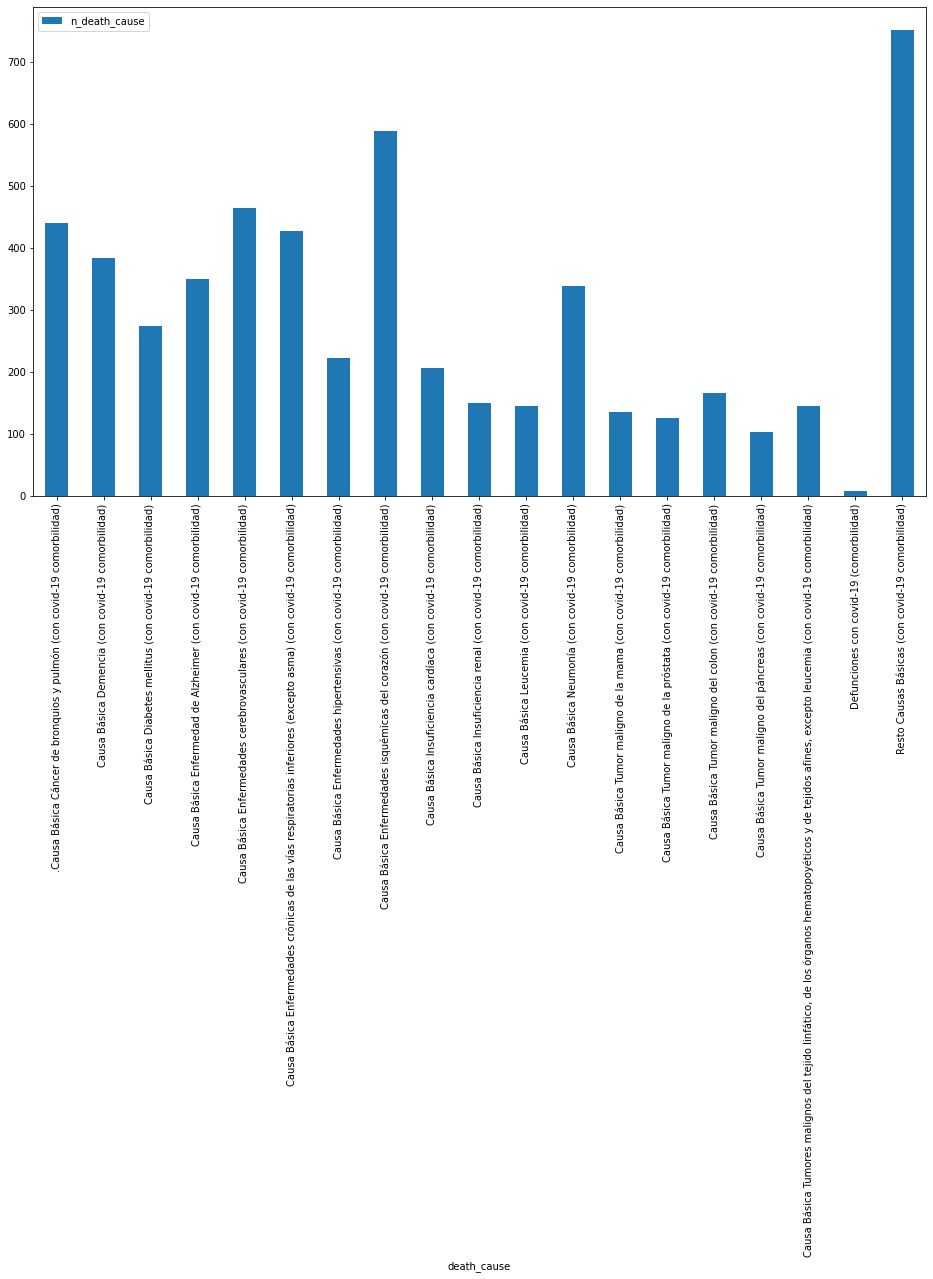

,year,covid,gender,death_cause_code,n_death_cause
0,2020,4,0,17,4
1,2020,4,0,11,169
2,2020,4,0,4,232
3,2020,4,0,7,294
4,2020,4,0,0,220
...,...,...,...,...,...
165,2020,2,1,16,8
166,2020,2,1,10,16
167,2020,2,1,12,28
169,2020,2,1,15,10


In [33]:
df_cause_covid_spain = pd.read_csv(DATA_PATH_SPAIN_CAUSA_COVID, sep=";", thousands=".")
df_cause_covid_spain = df_cause_covid_spain.rename(
    columns={"Covid-19": "covid", "Sexo": "gender", "Causas de muerte más frecuente": "death_cause", "Total": "n_death_cause"})
df_cause_covid_spain["year"] = 2020
df_cause_covid_spain = numerizacionDeAtributos(df_cause_covid_spain, standardize["covid"], "covid", False)
df_cause_covid_spain['covid'] = df_cause_covid_spain['covid'].replace(np.nan, 2)
df_cause_covid_spain = numerizacionDeAtributos(df_cause_covid_spain, standardize["gender"], "gender", False)
df_cause_covid_spain = hotEncoding(df_cause_covid_spain, "death_cause")
df_cause_covid_spain = removeRowsContainingUnnecessaryData(df_cause_covid_spain, "n_death_cause", "..")
df_cause_covid_spain["n_death_cause"] = pd.to_numeric(df_cause_covid_spain["n_death_cause"])

# graph
df_cause_covid_spain_graphic = df_cause_covid_spain.groupby(by=["death_cause", "gender"], as_index=False).sum()
df_cause_covid_spain_graphic = df_cause_covid_spain_graphic[df_cause_covid_spain_graphic["gender"] == 0]
df_cause_covid_spain_graphic.plot(x="death_cause", y="n_death_cause", figsize=(16,9), kind="bar")
plt.show()

# table
df_cause_covid_spain = df_cause_covid_spain[["year", "covid", "gender", "death_cause_code", "n_death_cause"]]
df_cause_covid_spain 

##### Numero de casos covid españa por ccaa

In [34]:
df_ncasos_covid = pd.read_csv(DATA_PATH_SPAIN_CASOS_COVID)
df_ncasos_covid = df_ncasos_covid.rename(
    columns={"ccaa_iso": "ccaa"})
df_ncasos_covid = numerizacionDeAtributos(df_ncasos_covid, standardize["ccaa"], "ccaa", False)
df_ncasos_covid = dateFormatter(df_ncasos_covid, "fecha")

## Graphic of deaths of covid in spain
fig = px.line(df_ncasos_covid, x="fecha", y="num_casos", color="ccaa",
              line_group="ccaa")
fig.show()

## Show table
df_ncasos_covid = df_ncasos_covid[["ccaa", "num_casos", "year", "month", "day"]]
df_ncasos_covid.head(n=20)


,ccaa,num_casos,year,month,day
0,1,0,2020,1,1
1,2,0,2020,1,1
2,3,0,2020,1,1
3,6,0,2020,1,1
4,18,0,2020,1,1
5,7,0,2020,1,1
6,8,0,2020,1,1
7,5,0,2020,1,1
8,9,0,2020,1,1
9,11,0,2020,1,1


##### Mortalidad covid 2020 (No lo uso)

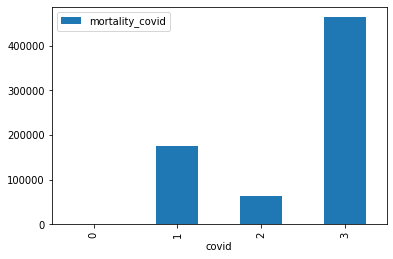

,ccaa,covid,gender,mortality_covid,year,week
15,0,0,0,1,2020,15
79,0,1,0,"2,269",2020,10
13,0,0,0,1,2020,13
153,0,2,0,"170,400",2020,15
8,0,0,0,1,2020,8
209,0,3,0,1,2020,2
4,0,0,0,1,2020,4
226,0,3,0,"836,600",2020,19
210,0,3,0,1,2020,3
17,0,0,0,1,2020,17


In [35]:
df_mortality_covid_spain = pd.read_csv(DATA_PATH_SPAIN_MORTALIDAD_COVID, sep=";", thousands=".", decimal=",")

df_mortality_covid_spain = df_mortality_covid_spain.rename(
    columns={"Comunidad y ciudad autónoma de defunción": "ccaa", "Covid-19": "covid", "Sexo": "gender", "Total": "mortality_covid"})

df_mortality_covid_spain = splitYearWeek(df_mortality_covid_spain, "Semana en el año 2020")
df_mortality_covid_spain = numerizacionDeAtributos(df_mortality_covid_spain, standardize["ccaa"], "ccaa", True)
df_mortality_covid_spain = numerizacionDeAtributos(df_mortality_covid_spain, standardize["covid"], "covid", False)
df_mortality_covid_spain = numerizacionDeAtributos(df_mortality_covid_spain, standardize["gender"], "gender", False)
df_mortality_covid_spain["year"] = df_mortality_covid_spain["year"].replace("Total", 2020)
df_mortality_covid_spain["mortality_covid"] = df_mortality_covid_spain["mortality_covid"].str.replace(",", "")
df_mortality_covid_spain = df_mortality_covid_spain[["ccaa", "covid", "gender", "mortality_covid", "year", "week"]]
df_mortality_covid_spain = removeRowsContainingUnnecessaryData(df_mortality_covid_spain, "mortality_covid", "..")
df_mortality_covid_spain = df_mortality_covid_spain.apply(pd.to_numeric)

df_mortality_covid_spain_graphic = df_mortality_covid_spain.groupby(by=["ccaa", "covid", "gender"], as_index=False).agg({
    "year": "mean",
    "week": "sum",
    "mortality_covid": "mean"
})
df_mortality_covid_spain_graphic[(df_mortality_covid_spain_graphic["ccaa"] == 0) & (df_mortality_covid_spain_graphic["gender"] == 0)].plot(x="covid", y="mortality_covid", kind="bar")
plt.show()
df_mortality_covid_spain[(df_mortality_covid_spain["ccaa"] == 0) & (df_mortality_covid_spain["gender"] == 0)].sample(n=50)

##### Vacunas españa


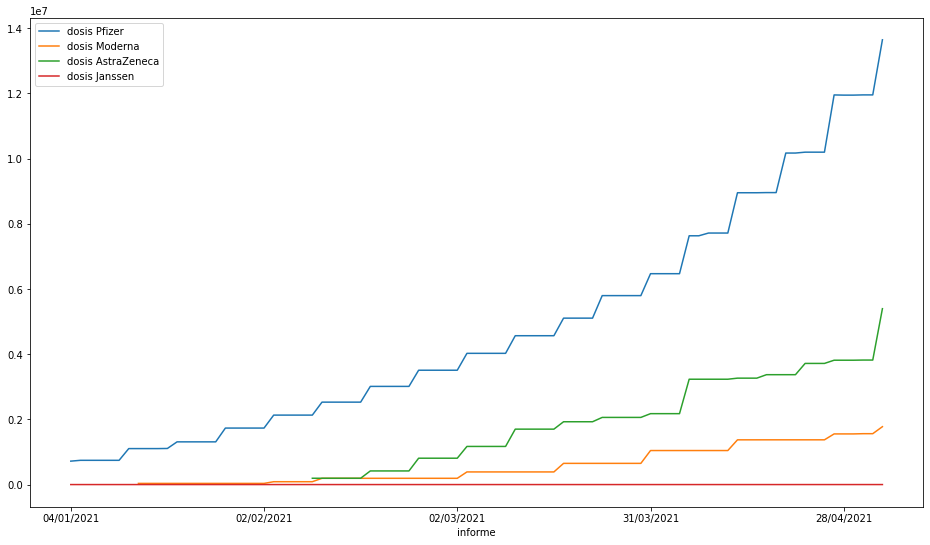

,ccaa,dosis Pfizer,dosis Moderna,dosis AstraZeneca,dosis Janssen,dosis entregadas,dosis administradas,% sobre entregadas,personas con al menos una dosis,personas con pauta completa,year,month,day
719,0,3012165,"192,000","418,000",0,3622165,3165191,87.4,NaN,1208305,2021,2,23
739,0,3508245,"192,000","808,600",0,4508845,3284678,72.8,NaN,1221183,2021,2,24
759,0,3508245,"192,000","808,600",0,4508845,3436158,76.2,NaN,1231782,2021,2,25
779,0,3508245,"192,000","808,600",0,4508845,3605635,80.0,NaN,1243783,2021,2,26
799,0,3508245,"192,000","808,600",0,4508845,3829465,84.9,NaN,1261848,2021,1,3
819,0,3508245,"192,000","808,600",0,4508845,3908734,86.7,NaN,1266700,2021,2,3
839,0,4026555,"387,600","1,169,800",0,5583955,4059320,72.7,NaN,1287002,2021,3,3
859,0,4026555,"387,600","1,169,800",0,5583955,4229092,75.7,NaN,1308913,2021,4,3
879,0,4026555,"387,600","1,169,800",0,5583955,4471577,80.1,NaN,1342485,2021,5,3
899,0,4026555,"387,600","1,169,800",0,5583955,4712191,84.4,NaN,1383488,2021,8,3


In [36]:
df_vacunas_spain = pd.read_csv(DATA_PATH_SPAIN_VACUNAS, thousands=",", decimal="." ,converters={"% sobre entregadas": percentageToNumeric})
df_vacunas_spain = df_vacunas_spain.rename(
    columns={"comunidad autónoma": "ccaa"})

df_vacunas_spain =  numerizacionDeAtributos(df_vacunas_spain, standardize["ccaa"], "ccaa", True)
df_vacunas_spain = df_vacunas_spain.fillna(0)

df_vacunas_spain["dosis Pfizer"] = df_vacunas_spain["dosis Pfizer"].str.replace(".", "") 
df_vacunas_spain["dosis Moderna"] = df_vacunas_spain["dosis Moderna"].str.replace(".", "")
df_vacunas_spain["dosis Moderna"] = df_vacunas_spain["dosis Moderna"].str.replace(",", "") 
df_vacunas_spain["dosis AstraZeneca"] = df_vacunas_spain["dosis AstraZeneca"].str.replace(".", "")
df_vacunas_spain["dosis AstraZeneca"] = df_vacunas_spain["dosis AstraZeneca"].str.replace(",", "") 
df_vacunas_spain["dosis entregadas"] = df_vacunas_spain["dosis entregadas"].str.replace(".", "") 
df_vacunas_spain["dosis administradas"] = df_vacunas_spain["dosis administradas"].str.replace(".", "") 
df_vacunas_spain["personas con al menos una dosis"] = df_vacunas_spain["personas con al menos una dosis"].str.replace(".", "") 
df_vacunas_spain["personas con pauta completa"] = df_vacunas_spain["personas con pauta completa"].str.replace(".", "") 
# df_vacunas_spain[["dosis Pfizer", "dosis Moderna", "dosis AstraZeneca", "dosis Janssen", "dosis entregadas", "dosis administradas", "personas con al menos una dosis", "personas con pauta completa"]] = df_vacunas_spain[["dosis Pfizer", "dosis Moderna", "dosis AstraZeneca", "dosis Janssen", "dosis entregadas", "dosis administradas", "personas con al menos una dosis", "personas con pauta completa"]].str.replace(".", "")
#df_vacunas_spain.describe()
df_vacunas_spain["dosis Pfizer"] = pd.to_numeric(df_vacunas_spain["dosis Pfizer"])
df_vacunas_spain["dosis Moderna"] = pd.to_numeric(df_vacunas_spain["dosis Moderna"])
df_vacunas_spain["dosis AstraZeneca"] = pd.to_numeric(df_vacunas_spain["dosis AstraZeneca"])
df_vacunas_spain[df_vacunas_spain["ccaa"] == 0].plot(x="informe", y=["dosis Pfizer", "dosis Moderna", "dosis AstraZeneca", "dosis Janssen"], figsize=(16, 9), kind="line")
plt.show()

#show table

df_vacunas_spain = dateFormatter(df_vacunas_spain, "informe")
df_vacunas_spain = df_vacunas_spain.drop(["última vacuna registrada", "informe"], axis=1)

df_vacunas_spain[df_vacunas_spain["ccaa"] == 0].tail(n=50)

#### Nacimientos en españa 2020 (enero - junio)

In [37]:
df_births_spain = pd.read_csv(DATA_PATH_SPAIN_NACIMIENTOS, sep=";", thousands=".")
df_births_spain = df_births_spain.rename(columns={"Comunidad autónoma de residencia de la madre": "ccaa", "Sexo": "gender", "Mes": "month", "Total": "births"})
df_births_spain = numerizacionDeAtributos(df_births_spain, standardize["gender"], "gender", True)
df_births_spain = numerizacionDeAtributos(df_births_spain, standardize["month"], "month", True)
df_births_spain = numerizacionDeAtributos(df_births_spain, standardize["ccaa"], "ccaa", True)
df_births_spain['year'] = 2020


## Graphic of deaths of covid in spain 
df_births_spain_graphic = df_births_spain[(df_births_spain["gender"] == 0) & (df_births_spain["month"] > 0)]
fig = px.line(df_births_spain_graphic, x="month", y="births", color="ccaa",
              line_group="ccaa")
fig.show()

#Show table
df_births_spain[(df_births_spain["ccaa"] == 0) & (df_births_spain["gender"] == 0)].sample(n=6)



,ccaa,month,gender,births,year
3,0,1,0,30199,2020
18,0,6,0,27836,2020
15,0,5,0,27883,2020
6,0,2,0,26753,2020
9,0,3,0,28616,2020
12,0,4,0,26760,2020


#### Poblacion 1971-2020

In [38]:
df_population_spain = pd.read_csv(DATA_PATH_SPAIN_POBLACION, sep=";", decimal=".", thousands=".")
df_population_spain = df_population_spain.rename(columns={"Comunidades y Ciudades Autónomas": "ccaa", "Sexo": "gender", "Periodo": "year", "Total": "population"})
df_population_spain = numerizacionDeAtributos(df_population_spain, standardize["gender"], "gender", True)
df_population_spain = numerizacionDeAtributos(df_population_spain, standardize["ccaa"], "ccaa", True)
df_population_spain.apply(pd.to_numeric)

## Graph
fig = px.line(df_population_spain[df_population_spain["gender"] == 0], x="year", y="population", color="ccaa",
              line_group="ccaa")
fig.show()

## Table
df_population_spain.sample(n=50)



,ccaa,gender,year,population
4,0,0,2016,"46,557,008"
1414,18,1,2006,"37,280"
986,13,0,2009,"6,386,932"
350,4,1,2020,"587,245"
1420,18,1,2000,"36,744"
223,2,1,1997,nan
555,7,2,2015,"1,219,616"
894,11,1,2001,"539,759"
240,3,0,2005,"1,076,635"
953,12,1,2017,"1,403,947"


#### Defunciones 2016 - 2020 (No lo uso)


In [39]:
df_deaths_2016_2020_spain = pd.read_csv(DATA_PATH_SPAIN_DEFUNCIONES_2016_2020, sep=";")
df_deaths_2016_2020_spain = df_deaths_2016_2020_spain.rename(
    columns={"Comunidad y ciudad autónoma de defunción": "ccaa", "Sexo": "gender","Lugar de ocurrencia": "place", "Mes de defunción": "month", "año": "year", "Total": "deaths"})
df_deaths_2016_2020_spain = numerizacionDeAtributos(df_deaths_2016_2020_spain, standardize["ccaa"], "ccaa", True)
df_deaths_2016_2020_spain = numerizacionDeAtributos(df_deaths_2016_2020_spain, standardize["gender"], "gender", False)
df_deaths_2016_2020_spain = numerizacionDeAtributos(df_deaths_2016_2020_spain, standardize["place"], "place", False)
df_deaths_2016_2020_spain = numerizacionDeAtributos(df_deaths_2016_2020_spain, standardize["month"], "month", False)
df_deaths_2016_2020_spain = df_deaths_2016_2020_spain[~df_deaths_2016_2020_spain['deaths'].isin(['..'])]
df_deaths_2016_2020_spain.sample(n=50)


,ccaa,place,gender,month,year,deaths
806,1,2,1,5,2019,956
2347,4,2,0,1,2018,199
4409,8,0,1,5,2016,751
6045,11,1,0,3,2020,650
4444,8,1,2,0,2016,2.209
9922,18,2,0,4,2018,10
4867,9,0,0,1,2018,7.789
3612,6,4,0,2,2018,11
3809,7,0,0,5,2016,2.190
6192,11,2,1,2,2018,144


#### Defunciones causa 2020 (No lo uso)

In [40]:
df_deaths_cause_spain = pd.read_csv(DATA_PATH_SPAIN_DEFUNCIONES_CAUSAS, sep=";")
df_deaths_cause_spain = df_deaths_cause_spain.rename(
    columns={"Comunidad y ciudad autónoma de defunción": "ccaa", "Sexo": "gender","Causas más frecuentes": "cause", "Mes de defunción": "month", "Total": "deaths"})
df_deaths_cause_spain = numerizacionDeAtributos(df_deaths_cause_spain, standardize["ccaa"], "ccaa", True)
df_deaths_cause_spain = numerizacionDeAtributos(df_deaths_cause_spain, standardize["gender"], "gender", False)
df_deaths_cause_spain = numerizacionDeAtributos(df_deaths_cause_spain, standardize["month"], "month", False)
df_deaths_cause_spain = df_deaths_cause_spain[~df_deaths_cause_spain.deaths.str.contains("..")]
df_deaths_cause_spain = hotEncoding(df_deaths_cause_spain, "cause")
df_deaths_cause_spain["year"] = 2020
df_deaths_cause_spain = df_deaths_cause_spain[["ccaa", "gender", "month", "deaths", "cause_code", "year"]]
df_deaths_cause_spain = df_deaths_cause_spain.apply(pd.to_numeric)
# df_deaths_cause_spain[(df_deaths_cause_spain["gender"] == 0) & df_deaths_cause_spain["ccaa"] == 0].plot(x="cause_code", y="deaths", kind="bar", figsize=(16,9))
df_deaths_cause_spain.sample(n=50)




,ccaa,gender,month,deaths,cause_code,year
4024,11,2,4,7,15,2020
5914,17,2,4,7,7,2020
6546,19,1,0,1,1,2020
1637,4,1,5,8,15,2020
2313,6,2,3,4,15,2020
2365,6,2,1,8,5,2020
2239,6,2,1,9,11,2020
1629,4,2,3,8,15,2020
6123,17,0,3,3,5,2020
5383,15,0,1,9,15,2020


#### Viajeros

In [41]:
df_viajeros = pd.read_csv(DATA_PATH_SPAIN_VIAJEROS, sep=";", encoding='latin-1', thousands=",")
df_viajeros = df_viajeros.rename(
    columns={"Comunidades Autónomas y Provincias": "ccaa", "Total": "n_viajeros"})

df_viajeros["n_viajeros"] = df_viajeros["n_viajeros"].str.replace(".", "")
df_viajeros['n_viajeros'] = df_viajeros['n_viajeros'].str.extract('(\d+)', expand=False)
df_viajeros['n_viajeros'] = df_viajeros['n_viajeros'].astype(float)
df_viajeros = df_viajeros.sort_values("Periodo")

fig = px.line(df_viajeros, x="Periodo", y="n_viajeros", color="ccaa",
              line_group="ccaa", title="Viajeros desde 1999 hasta el 2020")
fig.show()
df_viajeros = extraerEnteros(df_viajeros, "ccaa")
df_viajeros = splitYearMonth(df_viajeros, "Periodo")

df_viajeros["gender"] = 2
df_viajeros = df_viajeros[["ccaa","year", "month", "n_viajeros", "gender"]]

df_viajeros.sample(n=50)

,ccaa,year,month,n_viajeros,gender
1405,6,2015,05,"92,475",2
813,4,2020,03,"82,107",2
3016,11,2014,08,"142,999",2
1823,8,2002,10,"169,128",2
2102,7,2001,10,"350,335",2
748,3,2003,05,"95,672",2
4810,17,2020,11,"5,845",2
3908,19,2007,01,"4,130",2
4858,17,2016,11,"40,323",2
1903,7,2018,05,"444,738",2


#### Tabla de españa


In [42]:
# [ccaa	anio	mes	dia	sexo	edad	cod_ambito	defunciones_teoricas	defunciones	mortalidad	nacimientos	poblacion	defunciones_covid	covid19	lugar_de_ocurrencia	semana	n_casos	causa_muerte	n_turistas]
df_spain = pd.concat(
    [df_covid_momo, 
     df_defunciones_spain_total,
     df_births_spain, 
     df_population_spain, 
     df_deaths_covid_spain, 
     df_mortality_covid_spain,
     df_cause_covid_spain,
     df_deaths_cause_spain,
     df_ncasos_covid,
     df_viajeros,
     df_vacunas_spain
     ], axis=0) 
df_spain = df_spain.apply(pd.to_numeric) # convert all columns of DataFrame

df_spain.sample(n=50)


,ccaa,gender,age,year,month,day,deaths,births,population,covid,place,deaths_covid,mortality_covid,week,death_cause_code,n_death_cause,cause_code,num_casos,n_viajeros,dosis Pfizer,dosis Moderna,dosis AstraZeneca,dosis Janssen,dosis entregadas,dosis administradas,% sobre entregadas,personas con al menos una dosis,personas con pauta completa
64769,7,1,22,2020,3,17,36,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
117368,13,0,22,2020,9,2,127,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
19370,2,2,22,2021,1,1,22,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1623,0,1,22,2019,7,31,485,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3315,0,2,1,2020,2,10,111,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
100735,11,1,22,2020,3,31,31,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
245,17,nan,nan,2020,1,13,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
39043,4,2,1,2019,7,1,2,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
20638,2,0,1,2020,5,16,4,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
69788,7,0,16,2019,8,6,45,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [43]:

df_spain_ccaa = df_spain[(df_spain["ccaa"] != 0) & df_spain["gender"] != 0]
df_spain_ccaa["population"] = df_spain_ccaa["population"].interpolate()
df_spain_ccaa = df_spain_ccaa.fillna(0)

df_spain_ccaa = df_spain_ccaa.groupby(['ccaa','gender','year', 'covid', 'place', 'death_cause_code', 'cause_code'], as_index=False).agg({
      'deaths_covid': 'sum',
      'births': 'sum',
      'deaths': 'sum',
      'population': 'sum',
      'mortality_covid': 'sum',
      # 'death_cause': 'sum',
      'num_casos': 'sum',
      'n_viajeros': 'sum'
})

df_spain_ccaa.sample(n=50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ccaa,gender,year,covid,place,death_cause_code,cause_code,deaths_covid,births,deaths,population,mortality_covid,num_casos,n_viajeros
592,8,1,1997,0,0,0,0,0,0,0,"864,126",0,0,0
348,4,2,2000,0,0,0,0,0,0,0,"778,243",0,0,"6,687,569"
620,8,1,2020,3,0,0,0,0,0,0,"688,367","459,700",0,0
1299,18,1,2020,0,0,0,4,0,0,12,"119,716",0,0,0
225,2,2,2019,0,0,0,0,0,0,"8,230","1,009,842",0,0,"2,970,900"
572,7,2,2006,0,0,0,0,0,0,0,"1,606,306",0,0,"4,249,102"
866,12,1,2018,0,0,0,0,0,0,0,"1,401,134",0,0,0
813,11,2,2002,0,0,0,0,0,0,0,"892,687",0,0,"993,689"
571,7,2,2005,0,0,0,0,0,0,0,"1,599,598",0,0,"3,998,109"
493,6,2,2001,0,0,0,0,0,0,0,"621,115",0,0,"899,213"


###### Media poblacion

In [44]:

df_spain_total = df_spain[(df_spain["ccaa"] == 0) & (df_spain["gender"] == 0)]
# df_spain_total["population"] = df_spain_total["population"].interpolate()
calcularMedia(df_spain_total, "population")

,year,population
count,24,24
mean,"2,008","44,681,117"
std,7,"2,773,246"
min,"1,996","39,669,394"
25%,"2,003","42,497,272"
50%,"2,008","46,357,415"
75%,"2,014","46,833,764"
max,"2,020","47,450,795"


###### Media defunciones

In [45]:
df_defunciones_spain = df_defunciones_spain.groupby(["year", "ccaa"], as_index=False).agg({
    "deaths": "sum"
})
df_defunciones_spain_mean = df_defunciones_spain[df_defunciones_spain["ccaa"] == 0]
# df_defunciones_spain[df_defunciones_spain["ccaa"] == 0].describe()
df_defunciones_spain_mean.describe()

NameError: ignored

##### Media numero de casos covid por dia

In [ ]:
df_ncasos_covid.describe()

# Europa


#### Owid full dataset

In [46]:
df_owid_online = pd.read_csv(URL_OWID_COVID)
df_owid_online = df_owid_online[df_owid_online["continent"] == "Europe"]

fig = px.line(df_owid_online, x="date", y="total_cases_per_million", color="iso_code",
              line_group="iso_code")
fig.show()

fig = px.line(df_owid_online, x="date", y="total_tests_per_thousand", color="iso_code",
              line_group="iso_code")
fig.show()

df_owid_online[df_owid_online["location"] == "Spain"]



,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
73878,ESP,Europe,Spain,2020-02-01,1,1,nan,nan,nan,nan,0,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,11,"46,754,783",93,46,19,14,"34,272",1,99,7,27,31,nan,3,84,1
73879,ESP,Europe,Spain,2020-02-02,1,0,nan,nan,nan,nan,0,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,3,0,18,0,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,11,"46,754,783",93,46,19,14,"34,272",1,99,7,27,31,nan,3,84,1
73880,ESP,Europe,Spain,2020-02-03,1,0,nan,nan,nan,nan,0,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,11,"46,754,783",93,46,19,14,"34,272",1,99,7,27,31,nan,3,84,1
73881,ESP,Europe,Spain,2020-02-04,1,0,nan,nan,nan,nan,0,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,11,"46,754,783",93,46,19,14,"34,272",1,99,7,27,31,nan,3,84,1
73882,ESP,Europe,Spain,2020-02-05,1,0,nan,nan,nan,nan,0,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,11,"46,754,783",93,46,19,14,"34,272",1,99,7,27,31,nan,3,84,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74338,ESP,Europe,Spain,2021-05-06,"3,559,222","7,960","6,326","78,726",160,92,"76,125",170,135,"1,684",3,2,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,"19,048,132","13,271,511","5,956,451","558,552","383,362",41,28,13,"8,199",68,"46,754,783",93,46,19,14,"34,272",1,99,7,27,31,nan,3,84,1
74339,ESP,Europe,Spain,2021-05-07,"3,567,408","8,186","6,190","78,792",66,82,"76,300",175,132,"1,685",1,2,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,"381,863",nan,nan,nan,"8,167",68,"46,754,783",93,46,19,14,"34,272",1,99,7,27,31,nan,3,84,1
74340,ESP,Europe,Spain,2021-05-08,"3,567,408",0,"6,190","78,792",0,82,"76,300",0,132,"1,685",0,2,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,"380,364",nan,nan,nan,"8,135",68,"46,754,783",93,46,19,14,"34,272",1,99,7,27,31,nan,3,84,1
74341,ESP,Europe,Spain,2021-05-09,"3,567,408",0,"6,190","78,792",0,82,"76,300",0,132,"1,685",0,2,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,"19,830,624","13,797,431","6,221,476",nan,"378,865",42,30,13,"8,103",63,"46,754,783",93,46,19,14,"34,272",1,99,7,27,31,nan,3,84,1


 #### Vacunas en el mundo (No lo uso)

In [47]:
df_vaccinations_online = pd.read_csv(URL_OWID_VACCINATIONS)

## Graphic of deaths of covid in spain 
fig = px.line(df_vaccinations_online, x="date", y="total_vaccinations", color="iso_code",
              line_group="iso_code")
fig.show()

df_vaccinations_online.sort_values('date')

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
16943,World,OWID_WRL,2020-12-14,5,0,nan,nan,nan,0,0,nan,nan
2714,Canada,CAN,2020-12-14,5,nan,nan,nan,nan,0,nan,nan,nan
11145,North America,OWID_NAM,2020-12-14,5,0,nan,nan,nan,0,0,nan,nan
16944,World,OWID_WRL,2020-12-15,"1,529,223","28,500",nan,"1,529,218","1,529,218",0,0,nan,196
11146,North America,OWID_NAM,2020-12-15,723,0,nan,718,718,0,0,nan,1
...,...,...,...,...,...,...,...,...,...,...,...,...
15796,Trinidad and Tobago,TTO,2021-05-10,"61,345","60,245","1,100",225,"2,362",4,4,0,"1,688"
5225,European Union,OWID_EUN,2021-05-10,"174,797,309","126,088,333","49,184,283","767,233","2,924,703",39,28,11,"6,574"
14688,South Africa,ZAF,2021-05-10,"395,230","395,230","395,230",nan,"9,447",1,1,1,159
9480,Macao,MAC,2021-05-10,"120,294","78,460","41,989","1,607","1,731",19,12,6,"2,666"


#### Casos y muertes Europa (No lo uso)

In [48]:
df_covid_ecdc = pd.read_csv(URL_ECDC_COVID)
df_covid_ecdc.sort_values('dateRep')

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2020,continentExp
1079,01/03/2021,1,3,2021,219592,4319,Ireland,IE,IRL,4964440,Europe
215,01/03/2021,1,3,2021,247038,10191,Bulgaria,BG,BGR,6951482,Europe
287,01/03/2021,1,3,2021,242973,5526,Croatia,HR,HRV,4058165,Europe
359,01/03/2021,1,3,2021,34707,231,Cyprus,CY,CYP,888005,Europe
431,01/03/2021,1,3,2021,1240051,20469,Czechia,CZ,CZE,10693939,Europe
...,...,...,...,...,...,...,...,...,...,...,...
905,31/03/2021,31,3,2021,0,0,Hungary,HU,HUN,9769526,Europe
1121,31/03/2021,31,3,2021,16055,529,Italy,IT,ITA,59641488,Europe
689,31/03/2021,31,3,2021,30702,381,France,FR,FRA,67320216,Europe
1553,31/03/2021,31,3,2021,5820,34,Netherlands,NL,NLD,17407585,Europe


In [49]:
df_covid_ecdc_cases = pd.read_csv(URL_ECDC_COVID_CASES)
df_covid_online_sample = df_covid_ecdc_cases.sample(n=10)
df_covid_online_sample

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
60693,08/05/2020,8,5,2020,17,0,Vietnam,VN,VNM,"96,462,108",Asia,0
21205,08/05/2020,8,5,2020,65,0,Gabon,GA,GAB,"2,172,578",Africa,16
14973,23/11/2020,23,11,2020,1513,101,Czechia,CZ,CZE,"10,649,800",Europe,727
6365,27/03/2020,27,3,2020,1,0,Benin,BJ,BEN,"11,801,151",Africa,nan
43457,21/07/2020,21,7,2020,1013,40,Pakistan,PK,PAK,"216,565,317",Asia,15
38183,13/04/2020,13,4,2020,0,0,Mongolia,MN,MNG,"3,225,166",Asia,0
6190,18/09/2020,18,9,2020,0,0,Benin,BJ,BEN,"11,801,151",Africa,1
6032,02/06/2020,2,6,2020,0,0,Belize,BZ,BLZ,"390,351",America,0
12942,13/05/2020,13,5,2020,0,0,Comoros,KM,COM,"850,891",Africa,nan
25203,09/06/2020,9,6,2020,0,0,Guyana,GY,GUY,"782,775",America,2


#### Tipo de respuesta en cada pais de europa

In [50]:
df_covid_ecdc_response = pd.read_csv(URL_ECDC_COVID_RESPONSE)
df_covid_ecdc_response.sort_values('date_start')

,Country,Response_measure,date_start,date_end
630,Greece,StayHomeGen,2020-02-27,2020-03-22
186,Croatia,MasksMandatoryAllSpacesPartial,2020-02-28,2020-10-27
936,Liechtenstein,OutdoorOver1000,2020-02-28,2020-03-12
932,Liechtenstein,MassGatherAll,2020-02-28,2020-09-30
1546,Switzerland,MassGatherAll,2020-02-28,2020-10-01
...,...,...,...,...
647,Hungary,ClosPubAnyPartial,2021-04-07,NaN
275,Czechia,ClosPrimPartial,2021-04-12,NaN
595,Greece,ClosSecPartial,2021-04-12,NaN
354,Denmark,ClosPubAnyPartial,2021-04-13,NaN


#### Turismo en el mundo (1995-2016)

In [51]:
df_n_turism = pd.read_csv(DATA_PATH_EUR_NUM_TURISM)
df_n_turism

,Entity,Code,Year,"International tourism, number of arrivals"
0,Albania,ALB,1995,"304,000"
1,Albania,ALB,1996,"287,000"
2,Albania,ALB,1997,"119,000"
3,Albania,ALB,1998,"184,000"
4,Albania,ALB,1999,"371,000"
...,...,...,...,...
5204,Zimbabwe,ZWE,2012,"1,794,000"
5205,Zimbabwe,ZWE,2013,"1,833,000"
5206,Zimbabwe,ZWE,2014,"1,880,000"
5207,Zimbabwe,ZWE,2015,"2,057,000"


In [52]:
## Por regiones (Africa, europa....)
df_arrivals_turism = pd.read_csv(DATA_PATH_EUR_ARRIVALS_TURISM)
df_arrivals_turism

,Entity,Code,Year,International Tourist Arrivals
0,Africa,nan,1950,500000
1,Africa,nan,1960,800000
2,Africa,nan,1965,1400000
3,Africa,nan,1970,2400000
4,Africa,nan,1975,4700000
...,...,...,...,...
200,Middle East,nan,2014,55400000
201,Middle East,nan,2015,55900000
202,Middle East,nan,2016,53600000
203,Middle East,nan,2017,58000000
